# Country Cluster Identification

By: Seema Rani

### Clustering and PCA

### Problem Statement

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 
After the recent project that included a lot of awareness drives and funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

 

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.  

### Data
The datasets containing those socio-economic factors and the corresponding data dictionary are provided.

# Import libraries

In [1]:
import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## Step 1.Data Reading & Understanding

In [2]:
# Import the data from csv in to dataframe
Cou_det = pd.read_csv("Country-data.csv")
Cou_det.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# Checking column & row in dataset
Cou_det.shape

(167, 10)

In [4]:
Cou_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


## Step 2. Data Cleaning

In [6]:
# Checking percentage of missing values in each column
round(Cou_det.isnull().sum()/len(Cou_det.index), 2)*100

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

There is no missing  value in this data.

In [7]:
#Checking for duplicates
Cou_det.duplicated(subset = ['country'], keep = False).sum()

0

There is no duplicates in this data.

In [8]:
# Checking for unique value in any columns i.e only 1 value
unique =Cou_det.nunique()
unique = unique[unique.values ==1]
unique

Series([], dtype: int64)

No unique value in this data.

In [9]:
# Looking for spelling mistakes
print(Cou_det['country'].unique())

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel'
 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kiribati'
 'Kuwait' 'Kyrgyz Republic' 'Lao' 'Latvia' 'Lebanon' 'Lesotho' 'Liberia'
 '

There is no spelling mistakes in this data.

#### Checking for Outliers

In [10]:
Cou_det.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1a9fdd5f98>,
 'caps': [<matplotlib.lines.Line2D at 0x1a9fde8940>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a9fdd5e48>],
 'medians': [<matplotlib.lines.Line2D at 0x1a9fde8fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a9fde8f60>],
 'means': []}

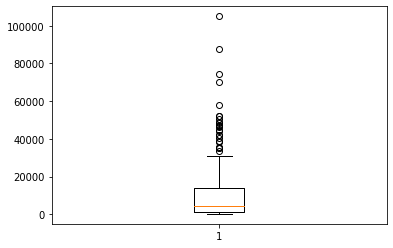

In [11]:
plt.boxplot(Cou_det.gdpp)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a9fe885f8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a9fe88cf8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a9fe881d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a9fe963c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a9fe96710>],
 'means': []}

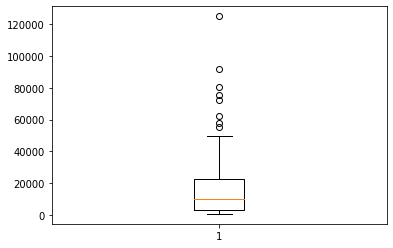

In [12]:
plt.boxplot(Cou_det.income)

{'whiskers': [<matplotlib.lines.Line2D object at 0x0000001A9FEEFCF8>, <matplotlib.lines.Line2D object at 0x0000001A9FEEFDD8>], 'caps': [<matplotlib.lines.Line2D object at 0x0000001A9FEFC3C8>, <matplotlib.lines.Line2D object at 0x0000001A9FEFC710>], 'boxes': [<matplotlib.lines.Line2D object at 0x0000001A9FEEF8D0>], 'medians': [<matplotlib.lines.Line2D object at 0x0000001A9FEFCA58>], 'fliers': [<matplotlib.lines.Line2D object at 0x0000001A9FEFCDA0>], 'means': []}


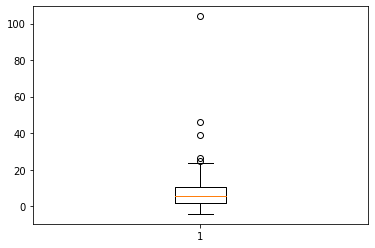

In [13]:
print(plt.boxplot(Cou_det.inflation))

As we have seen that gdpp, income and inflation column has outliers. However we will not remove outliers from inflation as this might lead to loss in country details which are not doing well- socio-economically(countries with direst need of aid).

In [14]:
Cou_det.set_index('country',inplace = True)

In [15]:
# Treating outlier First start with gdpp column.
Q1 = Cou_det.gdpp.quantile(0.05)
Q3 = Cou_det.gdpp.quantile(0.95)
#IQR = Q3-Q1
country_df = Cou_det[(Cou_det.gdpp <= Q3)]

In [16]:
country_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,40.196203,39.447462,6.688671,46.378265,14614.955696,8.099367,69.966456,3.009620,9913.379747
std,40.622685,25.243334,2.683807,23.229783,15224.031790,10.759661,8.780099,1.533079,12717.283188
min,2.600000,0.109000,1.970000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,10.300000,23.575000,4.872500,30.475000,3290.000000,1.935000,64.150000,1.810000,1310.000000
50%,20.900000,34.000000,6.105000,43.250000,9790.000000,5.460000,71.850000,2.530000,4480.000000
75%,62.500000,50.675000,8.250000,58.475000,20100.000000,11.175000,76.400000,4.200000,12075.000000
90%,103.100000,68.030000,10.560000,72.110000,36200.000000,16.850000,80.030000,5.346000,31670.000000
95%,116.450000,77.615000,11.345000,80.320000,41415.000000,21.125000,80.960000,5.912000,41815.000000
99%,154.300000,119.256000,13.573000,127.780000,73433.000000,42.081000,82.301000,6.567200,47115.000000


Most of the outliers handled by handling gdpp column.

In [17]:
country_df.shape

(158, 9)

## Step 3. Data Visualisation

<Figure size 432x288 with 0 Axes>

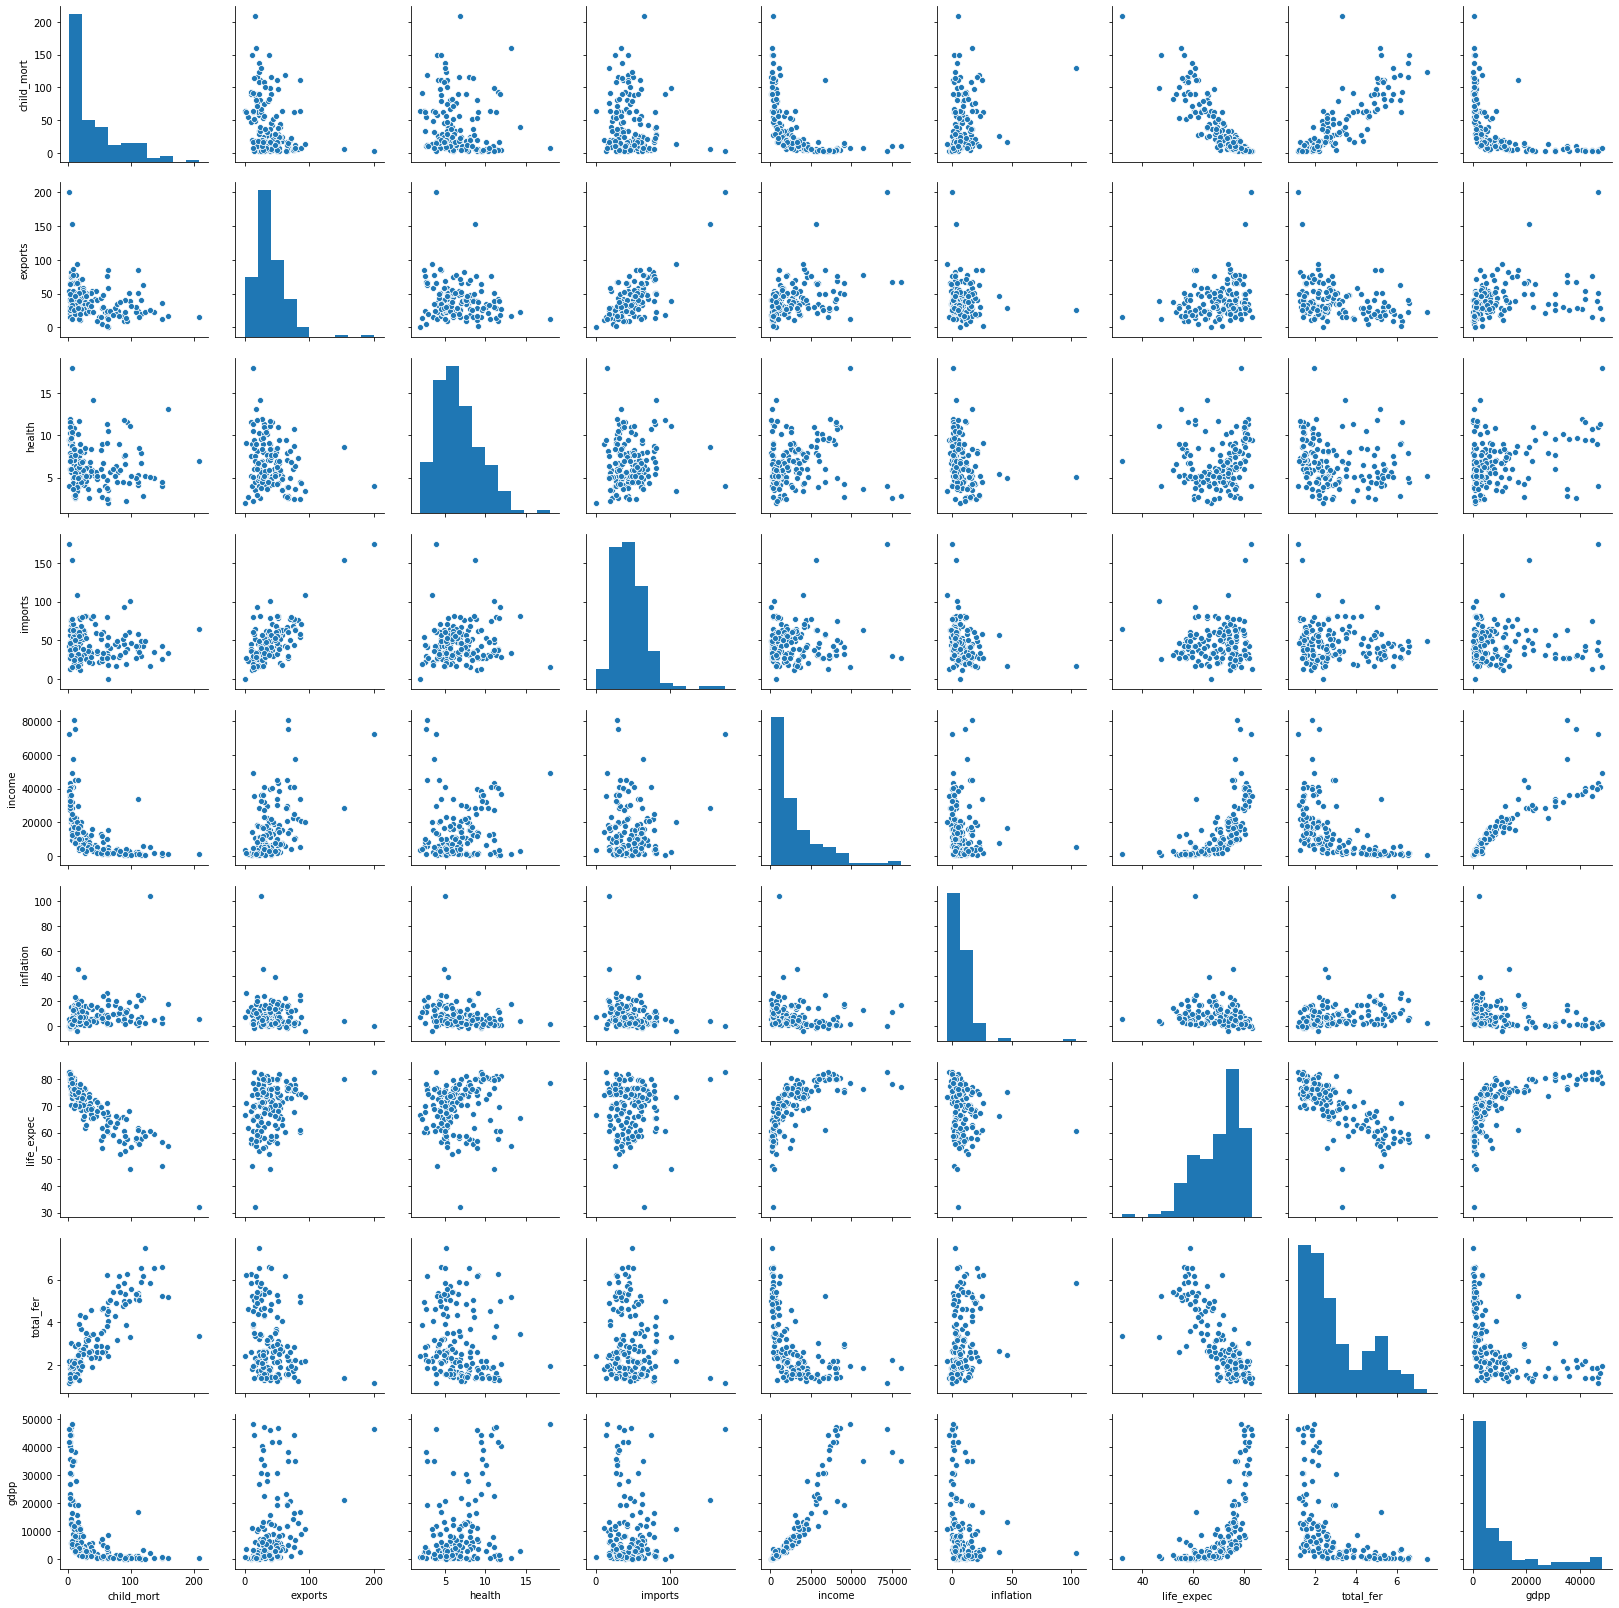

In [18]:
# Visualise numerical Data
plt.figure(figsize = (6,4))
sns.pairplot(country_df)
plt.show()

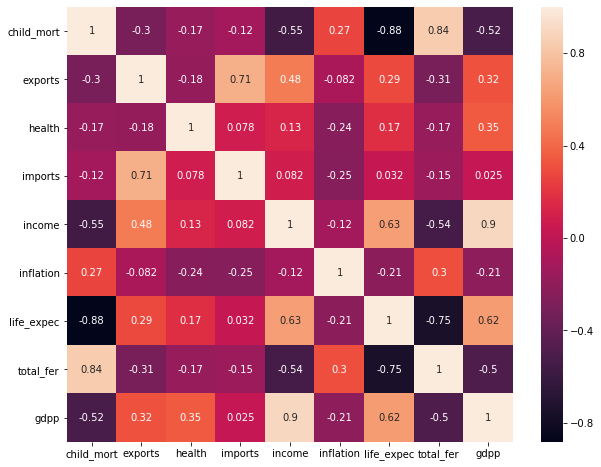

In [19]:
# Draw heatmap to understand the corelation.
plt.figure(figsize = (10,8))  
sns.heatmap(country_df.corr(),annot = True)

There is high correlation between total_fertility & Chil_mortality , Gdpp & income  and in between exports & imports.

## Step 4. Data Preparation

#### Data Scaling

In [20]:
# We observe that a lot of data varaibles are of different orders of magnitude

# Let's do rescaling on the features

# Standardise all parameters

# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create a scaling object
standard_scaler = StandardScaler()

country_new = standard_scaler.fit_transform(country_df)

In [21]:
country_new = pd.DataFrame(country_new)
country_new.columns = ['child_mort', 'exports', 'health', 'imports', 'income','inflation','life_expec','total_fer','gdpp']
country_new.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.234847,-1.170253,0.333170,-0.063839,-0.856955,0.124994,-1.572901,1.838989,-0.738376
1,-0.582710,-0.454926,-0.051834,0.095946,-0.308713,-0.336520,0.723646,-0.889676,-0.459367
2,-0.318473,-0.041627,-0.941453,-0.646837,-0.113006,0.745941,0.746497,-0.078274,-0.430180
3,1.946065,0.908169,-1.434856,-0.150209,-0.574267,1.333323,-1.127302,2.061470,-0.503541
4,-0.738289,0.240530,-0.246204,0.540752,0.295540,-0.620888,0.780774,-0.575585,0.180376


#### Perform PCA on Data

In [22]:
# Importing the PCA module

from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [23]:
# Doing the PCA on the train data
pca.fit(country_new)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [24]:
# List of PCA components.
pca.components_

array([[-4.29030525e-01,  2.55209832e-01,  1.34178285e-01,
         1.31450432e-01,  4.07693446e-01, -1.79172211e-01,
         4.31281152e-01, -4.14623599e-01,  3.99105167e-01],
       [ 1.11571336e-01,  6.26379514e-01, -2.77405040e-01,
         6.77160121e-01, -2.31878558e-02, -5.16544119e-02,
        -1.67479074e-01,  7.48372976e-02, -1.51147079e-01],
       [-4.15586874e-02,  1.65804096e-01, -6.21898369e-01,
        -3.00546950e-01,  2.52933247e-01,  6.41231036e-01,
         1.20926305e-01,  5.91157438e-03,  6.23316904e-02],
       [ 3.78896334e-01,  1.25334264e-01,  4.18106890e-01,
         3.92312068e-02,  4.08208237e-01,  2.46846528e-01,
        -2.31647606e-01,  3.66642523e-01,  4.98720267e-01],
       [-2.10302855e-01,  2.05622263e-02,  4.97644383e-01,
         2.62211666e-01, -2.60517467e-01,  6.88800973e-01,
         1.29156175e-01, -1.65619335e-01, -2.29167627e-01],
       [ 1.86245017e-01, -5.01345979e-02, -4.28272915e-03,
        -4.26434872e-02,  1.45028292e-01,  6.489172

In [25]:
# Understanding how the variables are loaded on the principal components. 
colnames = list(country_new.columns)
pca_new = pd.DataFrame({'PC_1':pca.components_[0],'PC_2':pca.components_[1], 'PC_3':pca.components_[2],
                       'PC_4':pca.components_[3], 'PC_5':pca.components_[4],'PC_6':pca.components_[5],
                       'PC_7':pca.components_[6], 'PC_8':pca.components_[7],'PC_9':pca.components_[8],
                       'Feature':colnames})
pca_new

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,Feature
0,-0.429031,0.111571,-0.041559,0.378896,-0.210303,0.186245,0.021920,0.717303,0.253528,child_mort
1,0.255210,0.626380,0.165804,0.125334,0.020562,-0.050135,-0.687057,0.084911,-0.130857,exports
2,0.134178,-0.277405,-0.621898,0.418107,0.497644,-0.004283,-0.286172,-0.018871,0.116417,health
3,0.131450,0.677160,-0.300547,0.039231,0.262212,-0.042643,0.598129,-0.016664,0.060813,imports
4,0.407693,-0.023188,0.252933,0.408208,-0.260517,0.145028,0.087549,-0.298465,0.645748,income
5,-0.179172,-0.051654,0.641231,0.246847,0.688801,0.064892,0.111285,0.005323,-0.045257,inflation
6,0.431281,-0.167479,0.120926,-0.231648,0.129156,-0.605914,0.060919,0.521296,0.241639,life_expec
7,-0.414624,0.074837,0.005912,0.366643,-0.165619,-0.754047,-0.003597,-0.303233,-0.006760,total_fer
8,0.399105,-0.151147,0.062332,0.498720,-0.229168,0.000134,0.253074,0.157553,-0.651057,gdpp


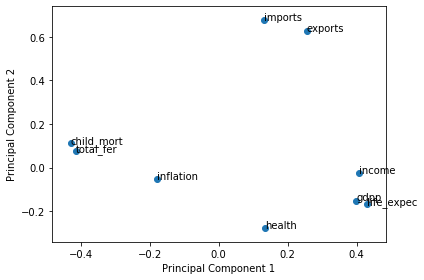

In [26]:
# Let's plot to visualise how these features are loaded

%matplotlib inline
fig = plt.figure(figsize = (6,4))
plt.scatter(pca_new.PC_1, pca_new.PC_2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pca_new.Feature):
    plt.annotate(txt, (pca_new.PC_1[i],pca_new.PC_2[i]))
plt.tight_layout()
plt.show()

Looking at the screeplot to assess the number of needed principal components.

In [27]:
# Check the variance ratios
pca.explained_variance_ratio_

array([0.45480475, 0.1766364 , 0.13336189, 0.10604223, 0.07260472,
       0.02594781, 0.01392215, 0.01011373, 0.00656633])

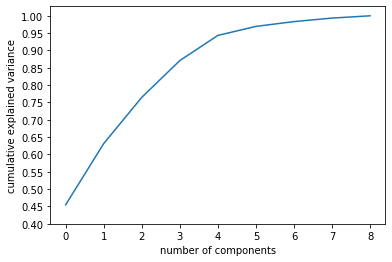

In [28]:
# Screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (6,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.yticks(np.arange(0.4,1.05,0.05))
plt.show()

Approx 95% of variance is explained by 5 components.

#### Dimensionality reduction using Incremental PCA

In [29]:
# Incremental PCA for efficiency checking
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

In [30]:
pca_final_1 = pca_final.fit_transform(country_new)
pca_final_1.shape

(158, 5)

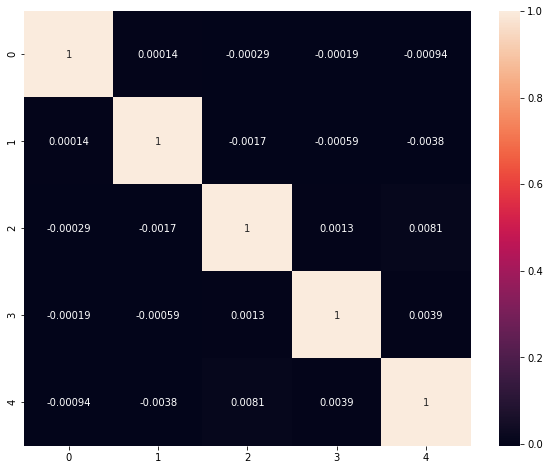

In [31]:
# Check corelation after performing PCA
Cor_matrix = np.corrcoef(pca_final_1.transpose())

# Correlation matrix
%matplotlib inline
plt.figure(figsize = (10,8))
sns.heatmap(Cor_matrix,annot = True)

In [32]:
Cor_new= Cor_matrix - np.diagflat(Cor_matrix.diagonal())
print("max corr:",Cor_new.max(), ", min corr: ", Cor_new.min(),)

max corr: 0.008069188238944824 , min corr:  -0.0038318816332859338


Correlation are almost approx 0.

In [33]:
# Transpose the data so that each column properly arranged.

PC = np.transpose(pca_final_1)

df_final = pd.DataFrame({'PC_1': PC[0],'PC_2':PC[1], 'PC_3':PC[2], 'PC_4':PC[3],'PC_5':PC[4]})
df_final.head()

,PC_1,PC_2,PC_3,PC_4,PC_5
0,-2.899440,-0.210920,-0.794008,0.808073,-0.151098
1,0.571663,-0.365855,-0.285368,-1.233879,0.278467
2,-0.082299,-0.334262,1.307774,-0.813505,0.215401
3,-2.830780,1.451765,1.559083,1.124602,-0.375038
4,1.295018,0.323543,-0.154906,-0.664375,-0.173215


In [34]:
df_final.shape

(158, 5)

## Step 5. Data Analysis

### Hopkins Statistics

The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words, how well the data can be clustered.

If the value is between {0.01, ...,0.3}, the data is regularly spaced.

If the value is around 0.5, it is random.

If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [35]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [36]:
hopkins(df_final)

0.8408460830098072

As value is > 0.7 the given dataset has a good tendency to form clusters.

### K Mean Clustering

#### Silhouette Analysis:

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [37]:
from sklearn.metrics import silhouette_score
SA_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(df_final)
    SA_.append([k, silhouette_score(df_final, kmeans.labels_)])

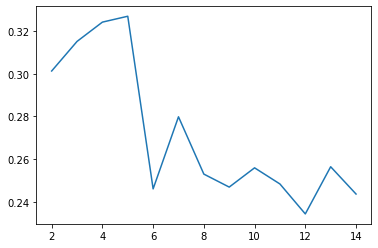

In [38]:
plt.plot(pd.DataFrame(SA_)[0], pd.DataFrame(SA_)[1])

###### Sum of Squared Distances

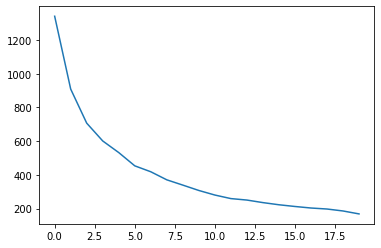

In [39]:
# sum of squared distances
ssqd = []
for num_clusters in list(range(1,21)):
    new_model = KMeans(n_clusters = num_clusters, max_iter=50)
    new_model.fit(df_final)
    ssqd.append(new_model.inertia_)

plt.plot(ssqd)

By looking silhouette analysis, we see the highest peak is at k =4 and in sum of squared distances graph , we see that the
elbow is in the range of 3 to 5 , so let us take k as 4.

###### K means with K=4

In [40]:
clust_4= KMeans(n_clusters = 4, max_iter=50,random_state = 50)
clust_4.fit(df_final)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [41]:
df_final_1 = df_final
df_final_1.index = pd.RangeIndex(len(df_final_1.index))
Cou_Det_km = pd.concat([df_final_1, pd.Series(clust_4.labels_)], axis=1)
Cou_Det_km.columns = ['PC_1', 'PC_2','PC_3','PC_4','PC_5','ClusterID']
Cou_Det_km.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,ClusterID
0,-2.899440,-0.210920,-0.794008,0.808073,-0.151098,1
1,0.571663,-0.365855,-0.285368,-1.233879,0.278467,0
2,-0.082299,-0.334262,1.307774,-0.813505,0.215401,0
3,-2.830780,1.451765,1.559083,1.124602,-0.375038,1
4,1.295018,0.323543,-0.154906,-0.664375,-0.173215,0


In [42]:
Cou_Det_km['ClusterID'].value_counts()

0    83
1    46
2    27
3     2
Name: ClusterID, dtype: int64

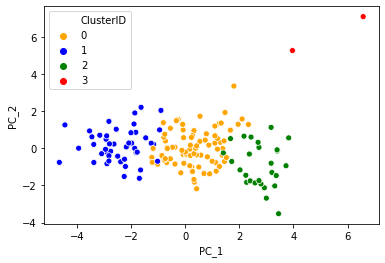

In [43]:
# scatter plot b/w PC_1, PC_2 and clusterId
sns.scatterplot(x='PC_1',y='PC_2',hue='ClusterID',data=Cou_Det_km, palette=['orange', 'blue','green','red'])

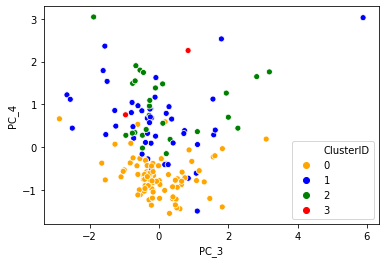

In [44]:
# scatter plot b/w PC_3, PC_2 and clusterId
sns.scatterplot(x='PC_3',y='PC_4',hue='ClusterID', data=Cou_Det_km, palette=['orange', 'blue','green','red'])

In [45]:
# merge b/w K-mean df and actual data
country_merge_df=pd.merge(country_df.reset_index(),Cou_Det_km,left_index=True,right_index=True )
country_merge_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC_1,PC_2,PC_3,PC_4,PC_5,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-2.899440,-0.210920,-0.794008,0.808073,-0.151098,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.571663,-0.365855,-0.285368,-1.233879,0.278467,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.082299,-0.334262,1.307774,-0.813505,0.215401,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-2.830780,1.451765,1.559083,1.124602,-0.375038,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1.295018,0.323543,-0.154906,-0.664375,-0.173215,0


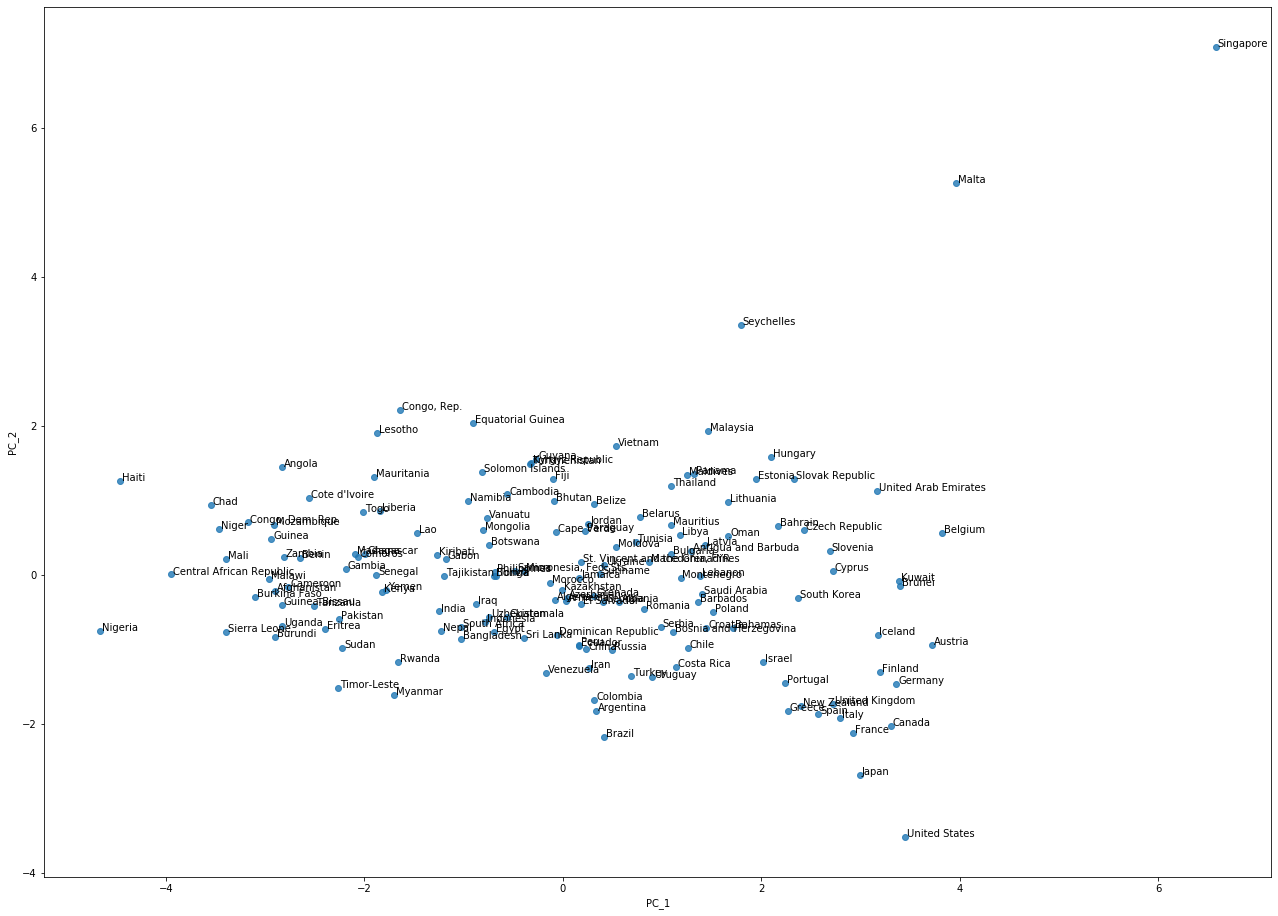

In [46]:
#plot b/w PC_1, PC_2 and country
plt.figure(figsize=(22, 16))
sns.regplot(x='PC_1', y='PC_2', data=country_merge_df, fit_reg=False)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))
        
label_point(country_merge_df.PC_1, country_merge_df.PC_2, country_merge_df.country, plt.gca()) 

###### Plots between Actual variables Vs Cluster Id

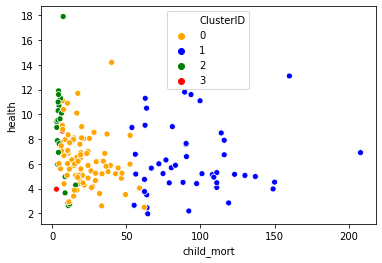

In [47]:
# Scatterplot for child_mort, health and Cluster Id
sns.scatterplot(x='child_mort',y='health',hue='ClusterID',data=country_merge_df,palette=['orange', 'blue','green','red'])

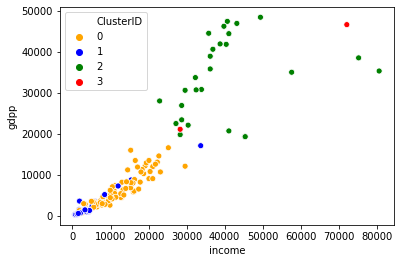

In [48]:
# Scatterplot b/w income, gdpp and Cluster ID
sns.scatterplot(x='income',y='gdpp',hue='ClusterID',data=country_merge_df,palette=['orange', 'blue','green','red'])

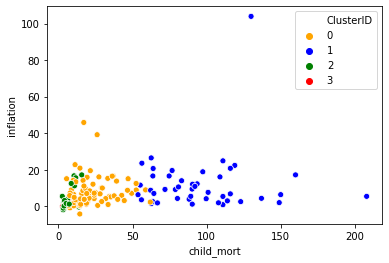

In [49]:
# Scatterplot b/w child mort ,infaltion and Cluster id
sns.scatterplot(x='child_mort', y='inflation',hue='ClusterID',data=country_merge_df,palette=['orange', 'blue','green','red'])

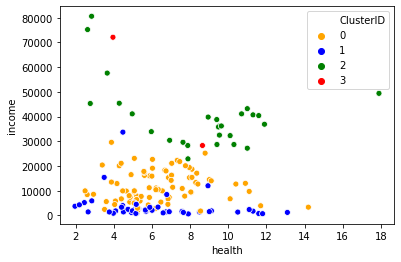

In [50]:
# Scatterplot b/w health, income and Cluster ID
sns.scatterplot(x='health',y='income',hue='ClusterID',data=country_merge_df,palette=['orange', 'blue','green','red'])

In [51]:
country_final=country_merge_df.drop(['PC_1','PC_2','PC_3','PC_4','PC_5'],axis=1)
country_final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


We have performed the clustering using principal components and allocated the cluster Id to the country.

### Clusters Analysis

In [52]:
child_mort_mean = pd.DataFrame(country_final.groupby(["ClusterID"]).child_mort.mean())
exports_mean= pd.DataFrame(country_final.groupby(["ClusterID"]).exports.mean())
health_mean = pd.DataFrame(country_final.groupby(["ClusterID"]).health.mean())
imports_mean = pd.DataFrame(country_final.groupby(["ClusterID"]).imports.mean())
income_mean = pd.DataFrame(country_final.groupby(["ClusterID"]).income.mean())
inflat_mean = pd.DataFrame(country_final.groupby(["ClusterID"]).inflation.mean())
life_expec_mean = pd.DataFrame(country_final.groupby(["ClusterID"]).life_expec.mean())
total_fer_mean = pd.DataFrame(country_final.groupby(["ClusterID"]).total_fer.mean())
gdpp_mean =pd.DataFrame(country_final.groupby(["ClusterID"]).gdpp.mean())

In [53]:
coun_analysis_df = pd.concat([pd.Series([0,1,2,3]),child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,
                                 inflat_mean,life_expec_mean,total_fer_mean,gdpp_mean], axis=1)

In [54]:
coun_analysis_df.columns = ["ClusterID","child_mort_mean","exports_mean","health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
coun_analysis_df

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,22.080723,40.835904,6.379036,48.590361,11657.228916,7.530530,72.583133,2.320120,6081.012048
1,1,94.439130,27.983022,6.206957,41.388389,3543.760870,11.879239,59.223913,5.007609,1749.782609
2,2,6.092593,44.559259,8.489630,39.366667,39933.333333,3.868037,79.370370,1.855185,33829.629630
3,3,4.800000,176.500000,6.305000,164.000000,50200.000000,1.892000,81.500000,1.255000,33850.000000


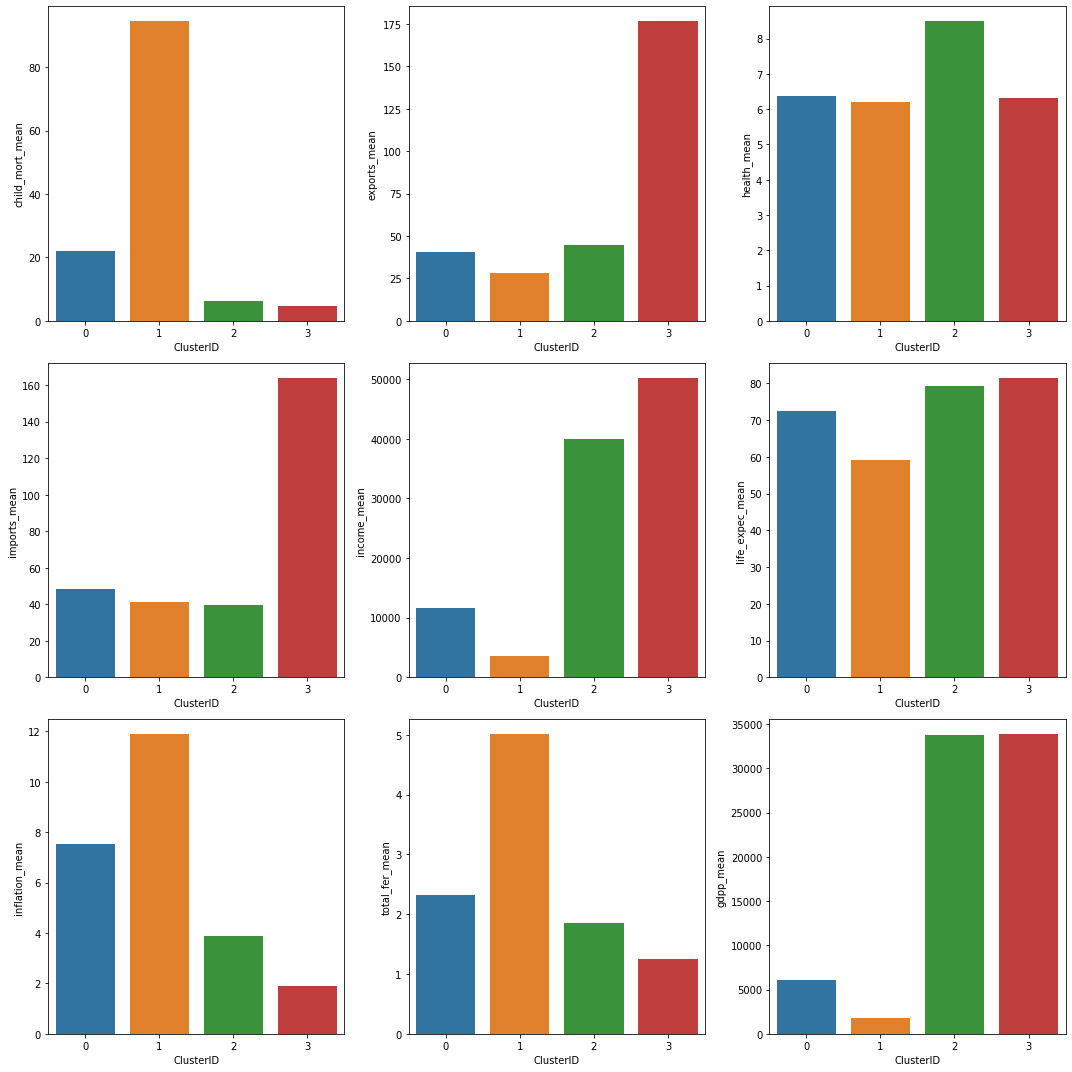

In [55]:
fig, axs = plt.subplots(3,3,figsize = (15,15))

sns.barplot(x=coun_analysis_df.ClusterID, y=coun_analysis_df.child_mort_mean, ax = axs[0,0])
sns.barplot(x=coun_analysis_df.ClusterID, y=coun_analysis_df.exports_mean, ax = axs[0,1])
sns.barplot(x=coun_analysis_df.ClusterID, y=coun_analysis_df.health_mean, ax = axs[0,2])
sns.barplot(x=coun_analysis_df.ClusterID, y=coun_analysis_df.imports_mean, ax = axs[1,0])
sns.barplot(x=coun_analysis_df.ClusterID, y=coun_analysis_df.income_mean, ax = axs[1,1])
sns.barplot(x=coun_analysis_df.ClusterID, y=coun_analysis_df.life_expec_mean, ax = axs[1,2])
sns.barplot(x=coun_analysis_df.ClusterID, y=coun_analysis_df.inflation_mean, ax = axs[2,0])
sns.barplot(x=coun_analysis_df.ClusterID, y=coun_analysis_df.total_fer_mean, ax = axs[2,1])
sns.barplot(x=coun_analysis_df.ClusterID, y=coun_analysis_df.gdpp_mean, ax = axs[2,2])
plt.tight_layout()

As per understanding Cluster 1 is the cluster of concern as it has:

1. Highest child mortality
2. Lowest income
3. Highest Inflation
4. Compartively low life expectancy 
5. Highest total fertility 
6. Lowest gdpp.

In [56]:
# Let look at Cluster 1.
cluster_km=country_final[country_final['ClusterID']==1]
cluster_km.sort_values(['gdpp','income','child_mort','health','inflation','life_expec','total_fer','imports','exports'], 
                      ascending=[True,True,False,True,False,True,False,False,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
25,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,1
85,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,1
36,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,1
107,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,1
125,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,1
89,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413,1
102,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,1
30,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,1
90,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,1
48,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482,1


As per K- means clustering, the country which are direst need of aid are:
  
1. Burundi
2. Liberia
3. Congo, Dem. Rep
4. Niger
5. Sierra Leone
6. Madagascar
7. Mozambique
8. Central African Republic
9. Malawi
10. Eritrea

### Hierarchical Clustering

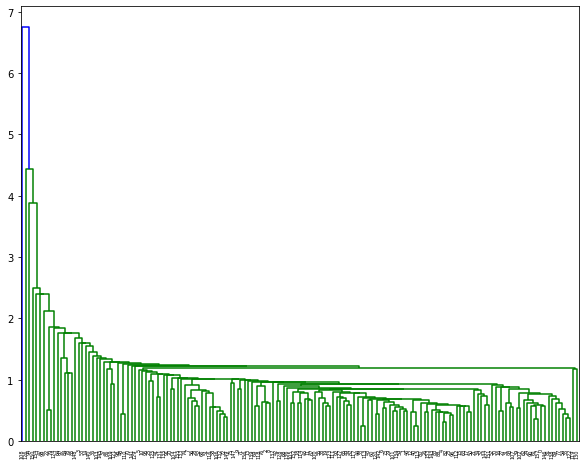

In [57]:
# Heirarchical clustering -Single method
df_clust = df_final
fig = plt.figure(figsize = (10,8))
mergings = linkage(df_clust, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

Single method of Hierarchical clustering is not giving clear picture, lets try complete menthod.

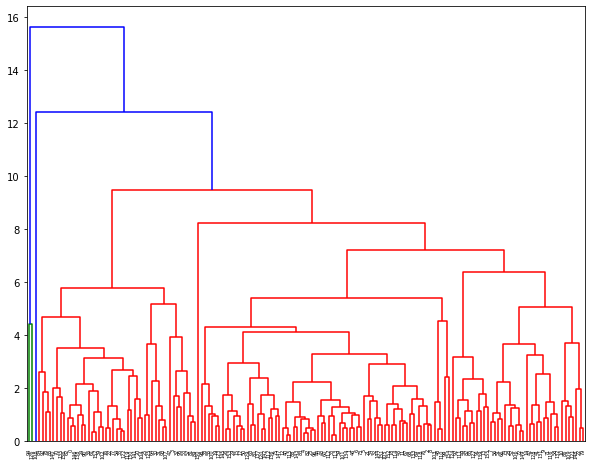

In [69]:
# Hierarchical Clustering- Complete method
fig = plt.figure(figsize = (10,8))
mergings = linkage(df_clust, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

Will cut the dendrogram vertically such that n_cluster=4.

In [59]:
Cut_cluster = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))

country_hc = pd.concat([country_df.reset_index(), Cut_cluster], axis=1)
country_hc.columns = ['country', 'child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp',
                  'ClusterID']
country_hc.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [60]:
country_hc['ClusterID'].value_counts()

1    110
0     45
2      2
3      1
Name: ClusterID, dtype: int64

###### Scatter plots b/w original varables and Cluster ID


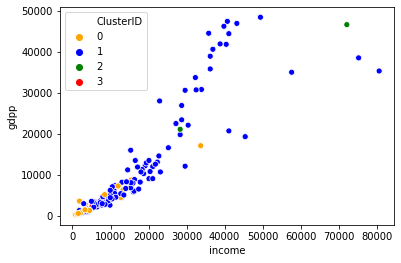

In [61]:
# scatterplot for income,gdpp for different cluster ids
sns.scatterplot(x='income',y='gdpp',hue='ClusterID',data=country_hc,palette=['orange', 'blue','green','red'])

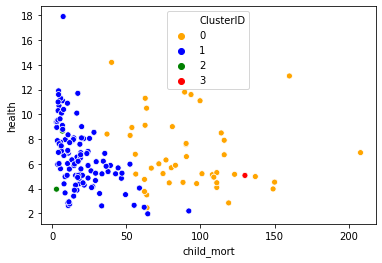

In [62]:
# Scatterplot for child_mort, health and Cluster Id
sns.scatterplot(x='child_mort',y='health',hue='ClusterID',data=country_hc,palette=['orange', 'blue','green','red'])

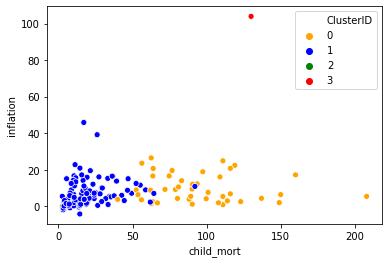

In [63]:
# Scatterplot b/w child mort ,infaltion and Cluster id
sns.scatterplot(x='child_mort', y='inflation',hue='ClusterID',data=country_hc,palette=['orange', 'blue','green','red'])

##### Clusters Analysis

In [64]:
child_mort_mean_hc = pd.DataFrame(country_hc.groupby(["ClusterID"]).child_mort.mean())
exports_mean_hc= pd.DataFrame(country_hc.groupby(["ClusterID"]).exports.mean())
health_mean_hc =pd.DataFrame(country_hc.groupby(["ClusterID"]).health.mean())
imports_mean_hc =pd.DataFrame(country_hc.groupby(["ClusterID"]).imports.mean())
income_mean_hc = pd.DataFrame(country_hc.groupby(["ClusterID"]).income.mean())
inflat_mean_hc = pd.DataFrame(country_hc.groupby(["ClusterID"]).inflation.mean())
life_expec_mean_hc = pd.DataFrame(country_hc.groupby(["ClusterID"]).life_expec.mean())
total_fer_mean_hc = pd.DataFrame(country_hc.groupby(["ClusterID"]).total_fer.mean())
gdpp_mean_hc = pd.DataFrame(country_hc.groupby(["ClusterID"]).gdpp.mean())

In [65]:
country_analysis_C= pd.concat([pd.Series([0,1,2,3]),child_mort_mean_hc,exports_mean_hc,health_mean_hc,
                                imports_mean_hc,income_mean_hc,inflat_mean_hc,life_expec_mean_hc,
                                   total_fer_mean_hc,gdpp_mean_hc], axis=1)

In [66]:
country_analysis_C.columns = ["ClusterID","child_mort_mean_hc","exports_mean_hc","health_mean_hc","imports_mean_hc","income_mean_hc","inflation_mean_hc","life_expec_mean_hc","total_fer_mean_hc","gdpp_mean_hc"]
country_analysis_C

,ClusterID,child_mort_mean_hc,exports_mean_hc,health_mean_hc,imports_mean_hc,income_mean_hc,inflation_mean_hc,life_expec_mean_hc,total_fer_mean_hc,gdpp_mean_hc
0,0,91.820000,30.000444,6.767333,44.668889,3950.733333,9.827222,59.104444,4.989778,1985.777778
1,1,18.904545,40.948900,6.678182,45.202417,18416.636364,6.633555,74.286364,2.205727,12790.218182
2,2,4.800000,176.500000,6.305000,164.000000,50200.000000,1.892000,81.500000,1.255000,33850.000000
3,3,130.000000,25.300000,5.070000,17.400000,5150.000000,104.000000,60.500000,5.840000,2330.000000


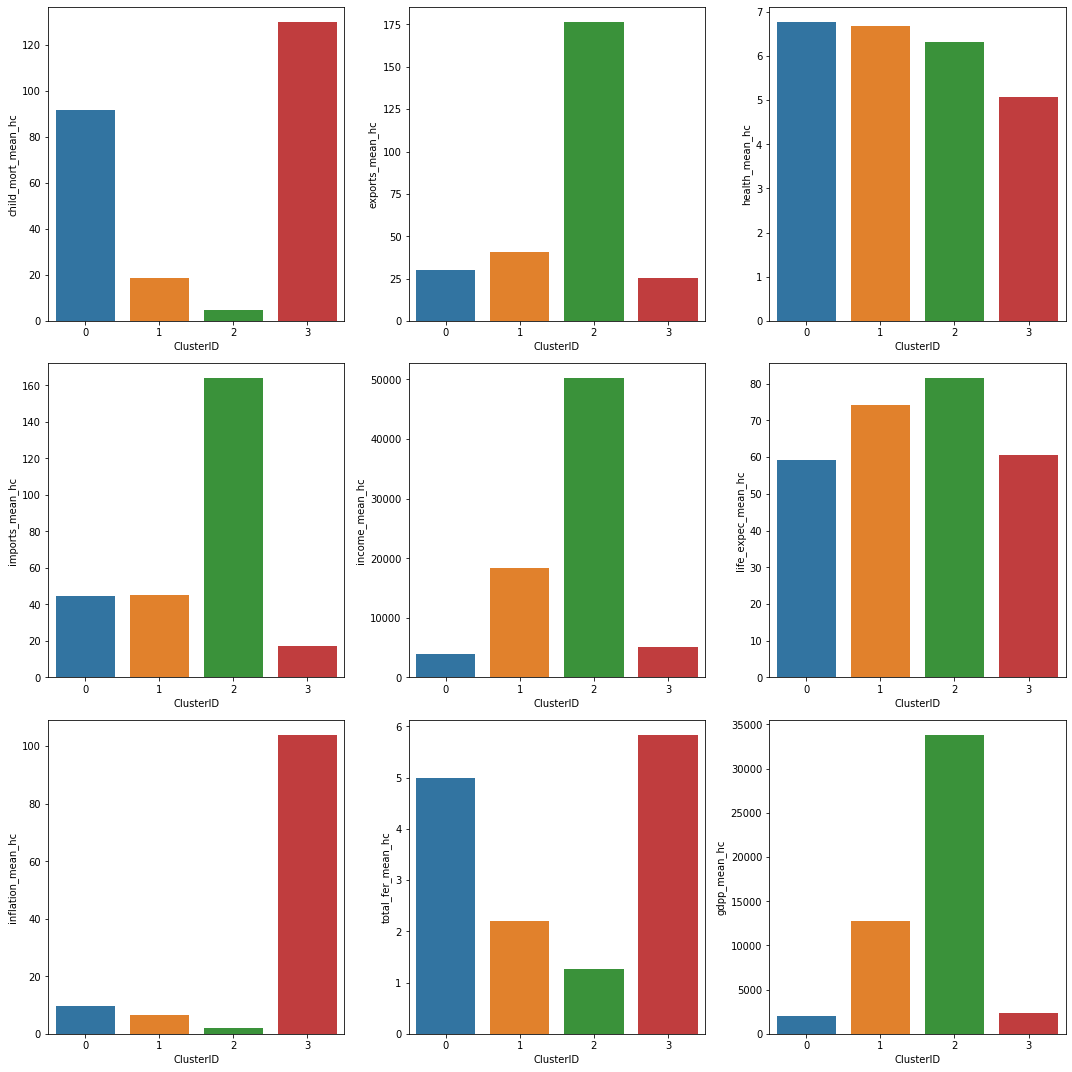

In [67]:
fig, axs = plt.subplots(3,3,figsize = (15,15))

sns.barplot(x=country_analysis_C.ClusterID, y=country_analysis_C.child_mort_mean_hc, ax = axs[0,0])
sns.barplot(x=country_analysis_C.ClusterID, y=country_analysis_C.exports_mean_hc, ax = axs[0,1])
sns.barplot(x=country_analysis_C.ClusterID, y=country_analysis_C.health_mean_hc, ax = axs[0,2])
sns.barplot(x=country_analysis_C.ClusterID, y=country_analysis_C.imports_mean_hc, ax = axs[1,0])
sns.barplot(x=country_analysis_C.ClusterID, y=country_analysis_C.income_mean_hc, ax = axs[1,1])
sns.barplot(x=country_analysis_C.ClusterID, y=country_analysis_C.life_expec_mean_hc, ax = axs[1,2])
sns.barplot(x=country_analysis_C.ClusterID, y=country_analysis_C.inflation_mean_hc, ax = axs[2,0])
sns.barplot(x=country_analysis_C.ClusterID, y=country_analysis_C.total_fer_mean_hc, ax = axs[2,1])
sns.barplot(x=country_analysis_C.ClusterID, y=country_analysis_C.gdpp_mean_hc, ax = axs[2,2])
plt.tight_layout()

As per business aspect, we are ignoring cluster 3 as it has only one country.

As per understanding Cluster 1 is the cluster of concern as it has:
    
1. Highest child mortality
2. Lowest income
3. Lowest Inflation
4. Compartively low life expectancy
5. Highest total fertility

Which all in turn leads to lowest gdpp.

In [68]:
#Lets look at Cluster 0
cluster_hc=country_hc[country_hc['ClusterID']==0]
cluster_hc.sort_values(['gdpp','income','child_mort','health','inflation','life_expec','total_fer','imports','exports'], 
                      ascending=[True,True,False,True,False,True,False,False,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
25,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,0
85,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,0
36,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,0
107,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,0
125,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,0
89,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413,0
102,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,0
30,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,0
90,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,0
141,Togo,90.3,40.20,7.65,57.3,1210,1.18,58.7,4.87,488,0


As per Heirarchical Clustering, Countries which are in need of aid are:

1. Burundi
2. Liberia
3. Congo, Dem. Rep.
4. Niger
5. Sierra Leone
6. Madagascar
7. Mozambique
8. Central African Republic
9. Malawi
10. Togo

##### Recommendation:

As per both K mean and Hierarchical clustering methods , Countries which are in need of aid are same.

1. Burundi
2. Liberia
3. Congo, Dem. Rep.
4. Niger
5. Sierra Leone
6. Madagascar
7. Mozambique
8. Central African Republic
9. Malawi
10. Togo